In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

In [2]:
df_train=pd.read_csv('./Data/train.csv')
df_test=pd.read_csv('./Data/test.csv')


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,20,RL,64.0,10475,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,245350.0
1,2,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000.0
2,3,80,RL,NaN,21453,Pave,NaN,IR1,Low,AllPub,...,0,NaN,NaN,NaN,0,10,2006,WD,Normal,180000.0
3,4,20,RL,60.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,128000.0
4,5,30,RM,60.0,8967,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,67000.0


In [4]:
df_train.shape

(2302, 81)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2302 entries, 0 to 2301
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2302 non-null   int64  
 1   MSSubClass     2302 non-null   int64  
 2   MSZoning       2298 non-null   object 
 3   LotFrontage    1915 non-null   float64
 4   LotArea        2302 non-null   int64  
 5   Street         2302 non-null   object 
 6   Alley          148 non-null    object 
 7   LotShape       2302 non-null   object 
 8   LandContour    2302 non-null   object 
 9   Utilities      2301 non-null   object 
 10  LotConfig      2302 non-null   object 
 11  LandSlope      2302 non-null   object 
 12  Neighborhood   2302 non-null   object 
 13  Condition1     2302 non-null   object 
 14  Condition2     2302 non-null   object 
 15  BldgType       2302 non-null   object 
 16  HouseStyle     2302 non-null   object 
 17  OverallQual    2302 non-null   int64  
 18  OverallC

In [6]:
df_train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      387
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

## ANÁLISIS DE LAS VARIABLES NUMÉRICAS

In [7]:
num_cols=df_train.select_dtypes(include='number').columns
num_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

#### **MSSUBCLASS**

<Axes: xlabel='MSSubClass', ylabel='count'>

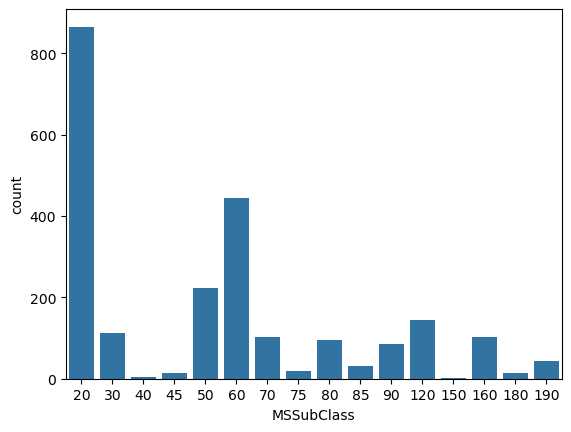

In [8]:
sns.barplot(df_train.MSSubClass.value_counts())

In [9]:
df_train.MSSubClass.isna().sum()

0

In [10]:
df_train.groupby('MSSubClass').agg({
    'SalePrice': ['median']
})

,SalePrice
,median
MSSubClass,
20,174784.28070
30,109950.00000
40,133000.00000
45,131468.31290
50,141044.70850
60,228500.00000
70,161000.00000
75,179500.00000


<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

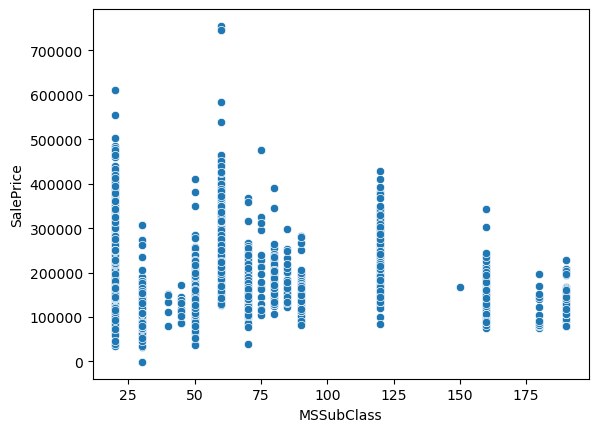

In [11]:
sns.scatterplot(data=df_train,x='MSSubClass',y='SalePrice')

#### LotFrontage

<Axes: xlabel='LotFrontage', ylabel='Count'>

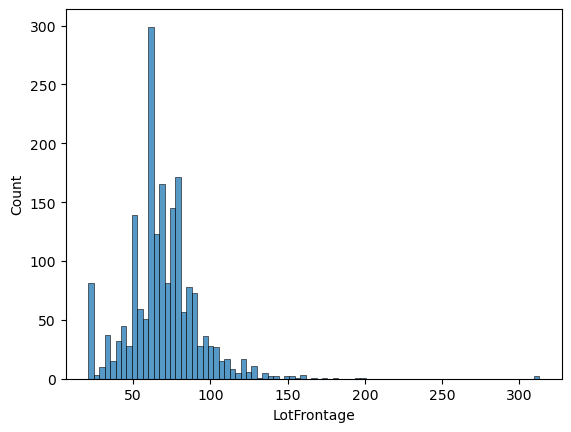

In [12]:
sns.histplot(df_train.LotFrontage)

In [13]:
df_train.LotFrontage.isna().sum() / len(df_train)   #16% de nulos

0.1681146828844483

<Axes: xlabel='LotFrontage', ylabel='SalePrice'>

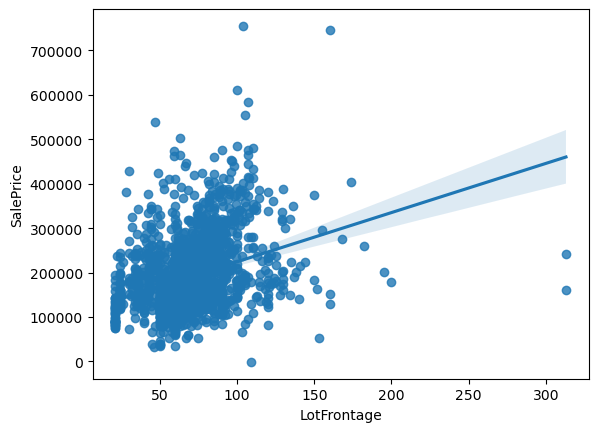

In [14]:
sns.regplot(data=df_train,x='LotFrontage',y='SalePrice')

#### **LotArea**

<Axes: xlabel='LotArea', ylabel='Count'>

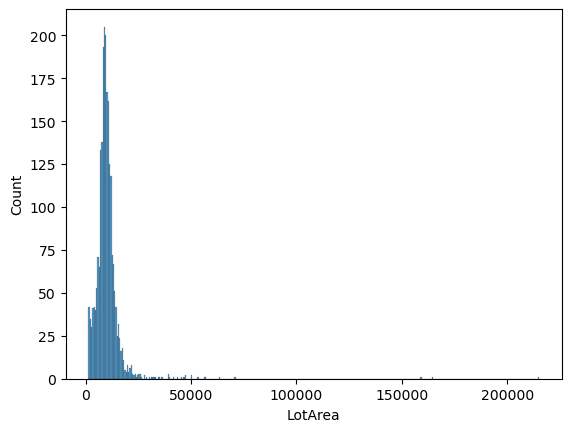

In [15]:
sns.histplot(df_train.LotArea)

In [16]:
df_train.LotArea.isna().sum() / len(df_train)

0.0

<Axes: xlabel='LotArea', ylabel='SalePrice'>

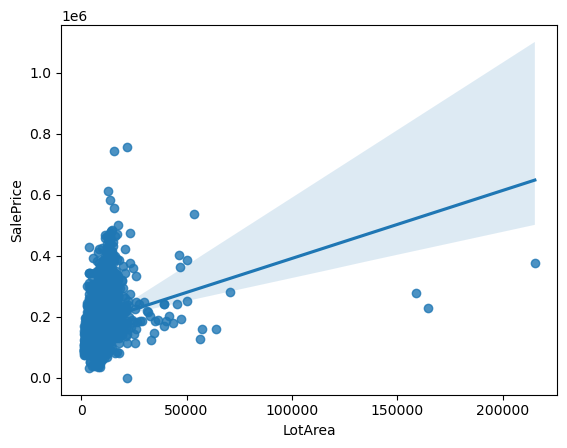

In [17]:
sns.regplot(data=df_train,x='LotArea',y='SalePrice')

#### **OverallQual**

In [18]:
df_train.OverallQual.value_counts()

OverallQual
5     657
6     590
7     474
8     263
4     164
9      85
3      33
10     23
2      10
1       3
Name: count, dtype: int64

In [19]:
df_train.OverallQual.isna().sum() /len(df_train)

0.0

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

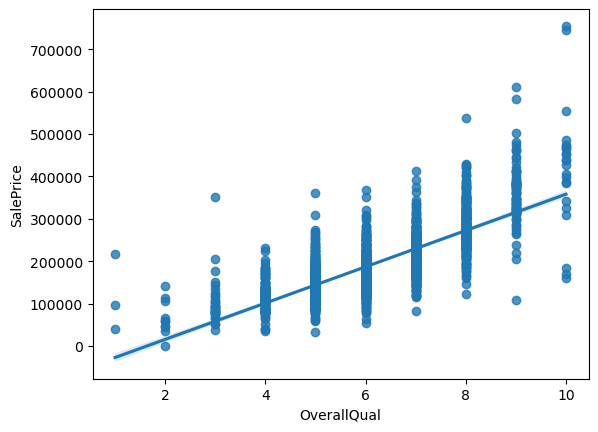

In [20]:
sns.regplot(data=df_train,x='OverallQual',y='SalePrice')

#### **OverallCond**

In [21]:
df_train.OverallCond.value_counts()

OverallCond
5    1294
6     428
7     305
8     112
4      81
3      37
9      32
2       8
1       5
Name: count, dtype: int64

In [22]:
df_train.OverallCond.isna().sum( ) / len(df_train)

0.0

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

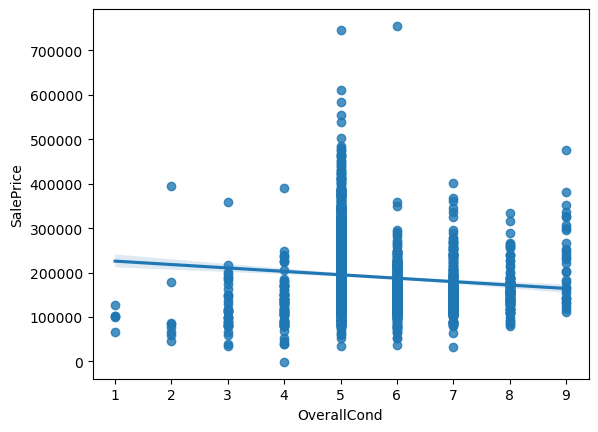

In [23]:
sns.regplot(data=df_train,x='OverallCond',y='SalePrice')

#### **YearBuilt**

In [24]:
df_train.YearBuilt.isna().sum()

0

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

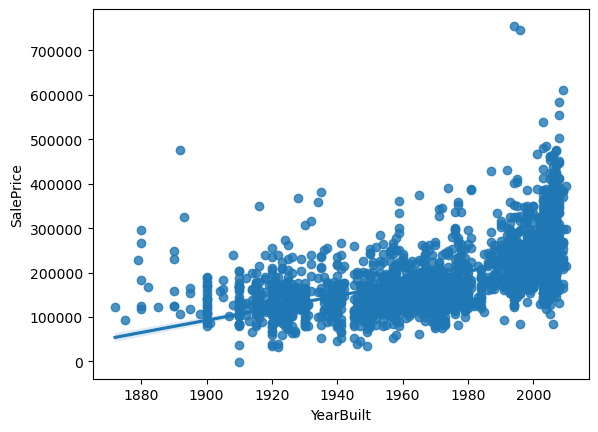

In [25]:
sns.regplot(data=df_train,x='YearBuilt',y='SalePrice')

#### **YearRemodAdd**

In [26]:
df_train.YearRemodAdd.isna().sum()

0

<Axes: xlabel='YearRemodAdd', ylabel='SalePrice'>

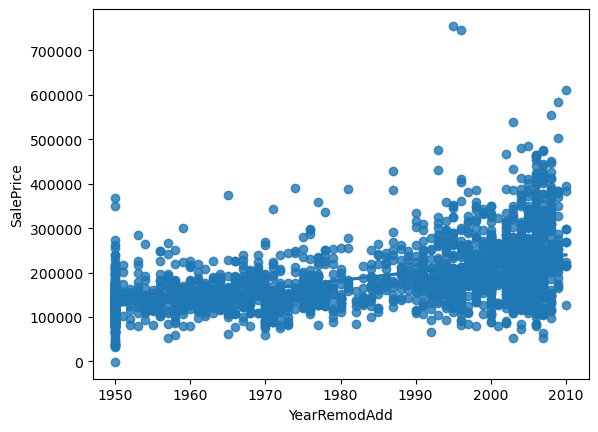

In [27]:
sns.regplot(data=df_train,x='YearRemodAdd',y='SalePrice')

#### **MasVnrArea**

<Axes: xlabel='MasVnrArea', ylabel='Count'>

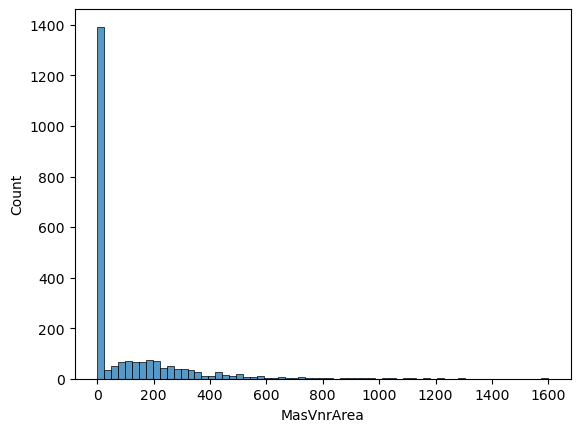

In [28]:
sns.histplot(df_train.MasVnrArea)

In [29]:
df_train.MasVnrArea.isna().sum() / len(df_train)

0.008688097306689836

<Axes: xlabel='MasVnrArea', ylabel='SalePrice'>

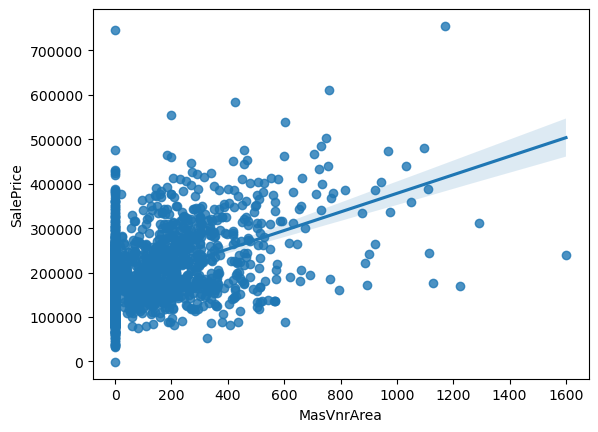

In [30]:
sns.regplot(data=df_train,x='MasVnrArea',y='SalePrice')

#### **BsmtFinSF1**

<Axes: xlabel='BsmtFinSF1', ylabel='Count'>

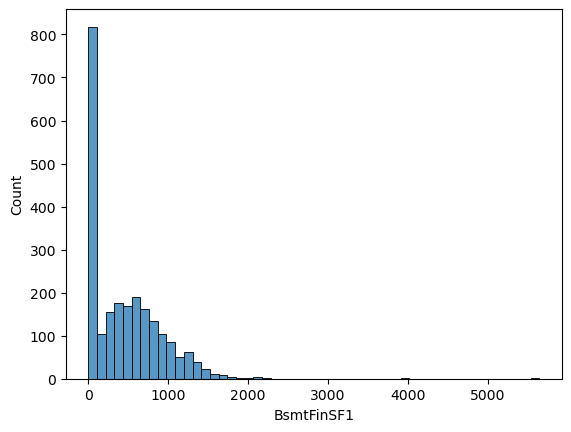

In [31]:
sns.histplot(df_train.BsmtFinSF1)

In [32]:
df_train.BsmtFinSF1.isna().sum()

0

<Axes: xlabel='BsmtFinSF1', ylabel='SalePrice'>

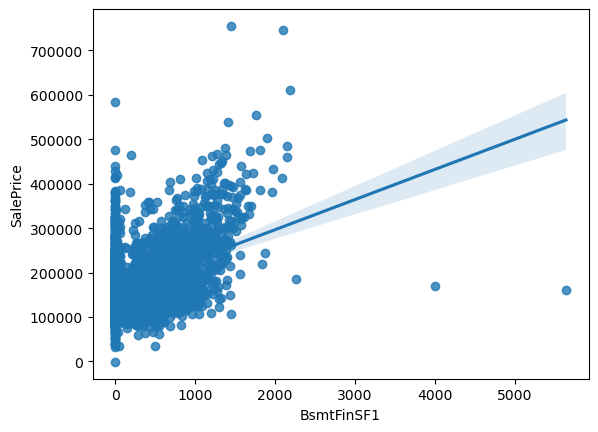

In [33]:
sns.regplot(data=df_train,x='BsmtFinSF1',y='SalePrice')

#### **BsmtFinSF2**

<Axes: xlabel='BsmtFinSF2', ylabel='Count'>

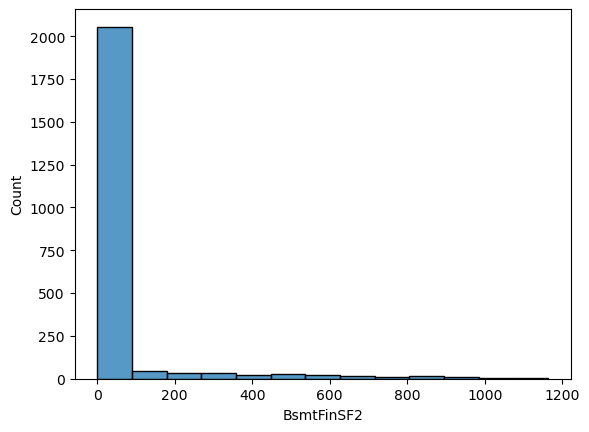

In [34]:
sns.histplot(df_train.BsmtFinSF2)

In [35]:
df_train.BsmtFinSF2.isna().sum()

0

<Axes: xlabel='BsmtFinSF2', ylabel='SalePrice'>

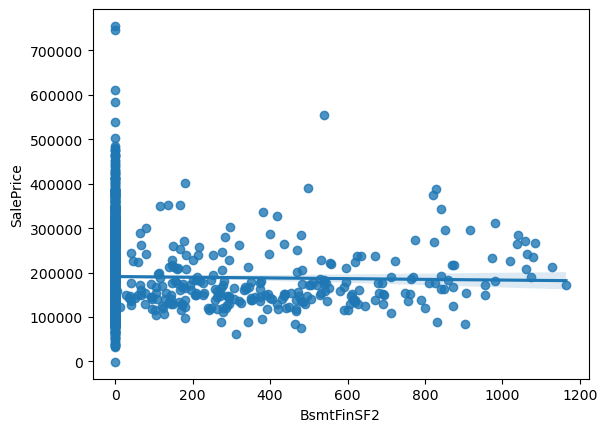

In [36]:
sns.regplot(data=df_train,x='BsmtFinSF2',y='SalePrice')

#### **BsmtUnfSF**

/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='BsmtUnfSF', ylabel='Count'>

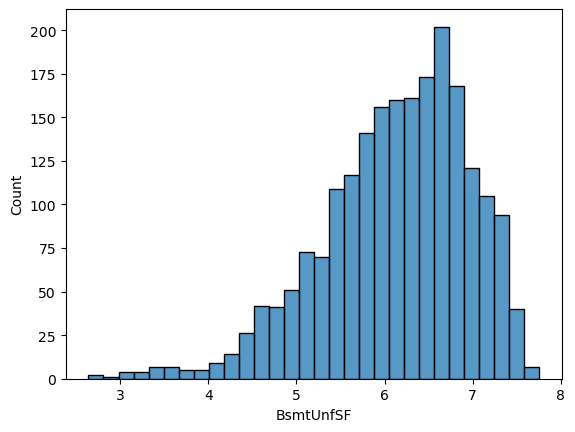

In [37]:
sns.histplot(np.log(df_train.BsmtUnfSF))

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

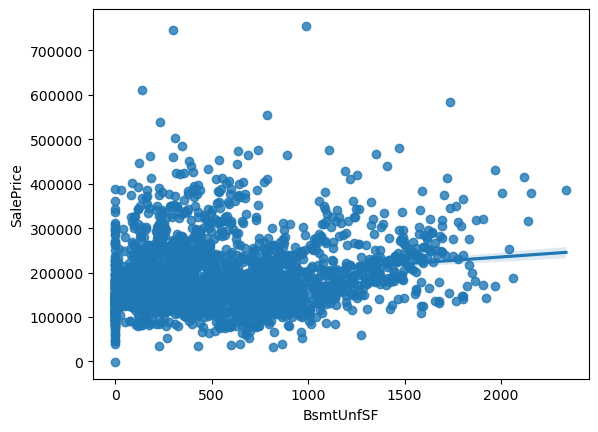

In [38]:
sns.regplot(data=df_train,x='BsmtUnfSF',y='SalePrice')

#### **TotalBsmtSF**

/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='TotalBsmtSF', ylabel='Count'>

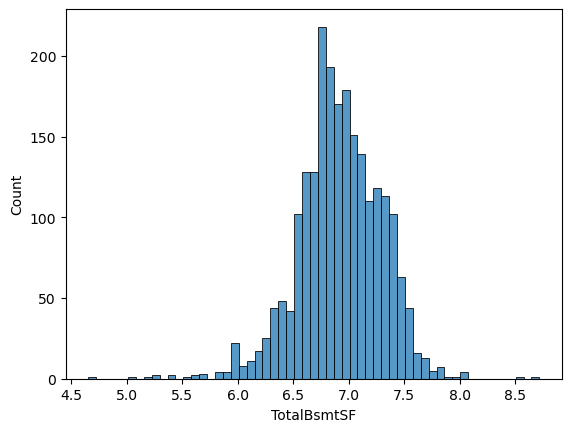

In [39]:
sns.histplot(np.log(df_train.TotalBsmtSF))

/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start


/Users/mariolamas/anaconda3/envs/pruebp11/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

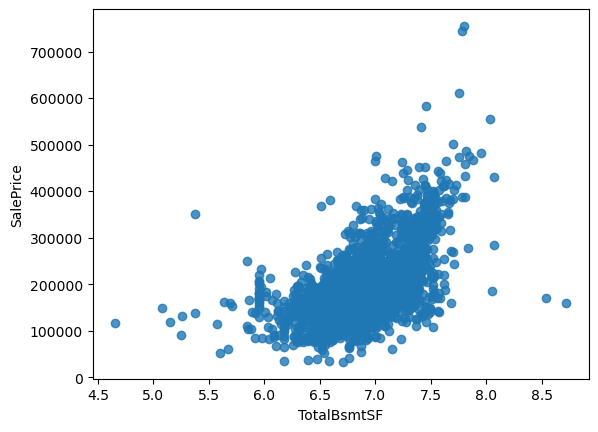

In [40]:
sns.regplot(data=df_train,x=np.log(df_train['TotalBsmtSF']),y='SalePrice')

#### **1stFlrSF**

<Axes: xlabel='1stFlrSF', ylabel='Count'>

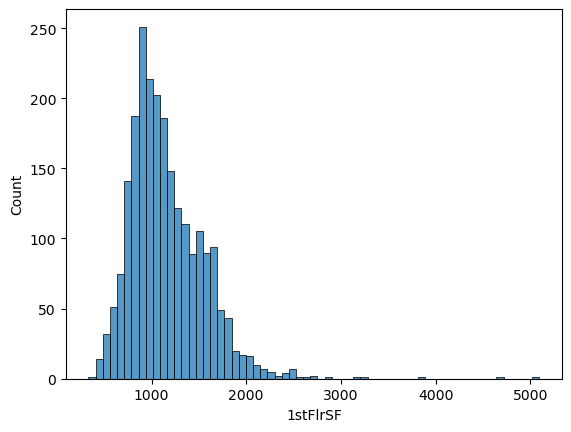

In [41]:
sns.histplot(df_train['1stFlrSF'])

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

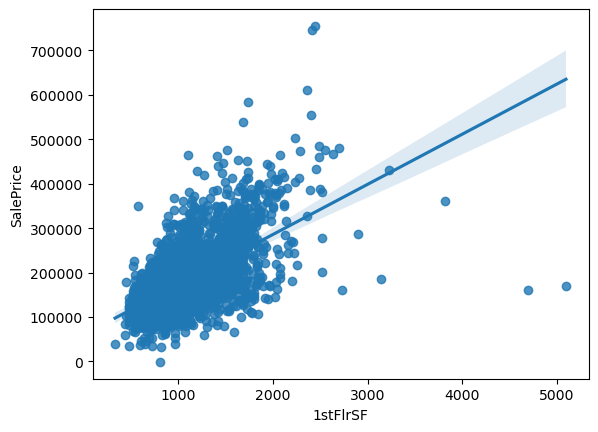

In [42]:
sns.regplot(data=df_train,x='1stFlrSF',y='SalePrice')

#### **LowQualFinSF**

In [43]:
df_train.LowQualFinSF.value_counts()

LowQualFinSF
0      2270
80        3
205       2
114       1
384       1
312       1
232       1
697       1
436       1
512       1
140       1
514       1
390       1
473       1
120       1
479       1
371       1
513       1
360       1
572       1
431       1
450       1
515       1
420       1
259       1
397       1
156       1
144       1
481       1
108       1
Name: count, dtype: int64

<Axes: xlabel='LowQualFinSF', ylabel='SalePrice'>

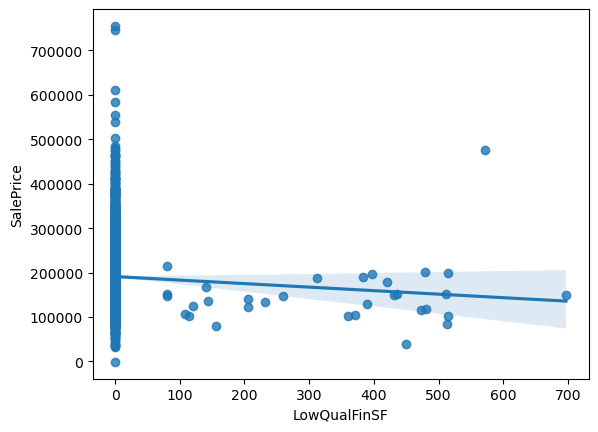

In [44]:
sns.regplot(data=df_train,x='LowQualFinSF',y='SalePrice')

#### **GrLivArea**

<Axes: xlabel='GrLivArea', ylabel='Count'>

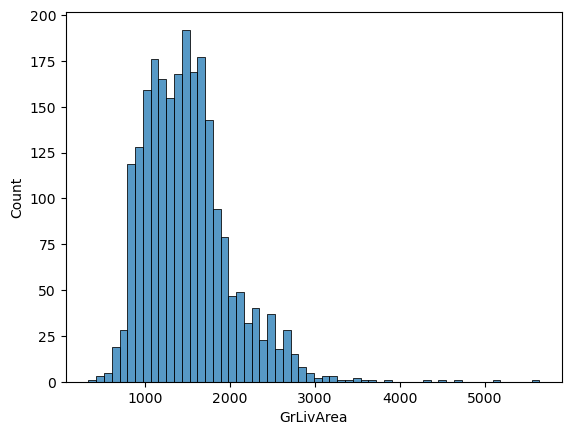

In [45]:
sns.histplot(df_train.GrLivArea)

In [46]:
df_train.GrLivArea.isna().sum()

0

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

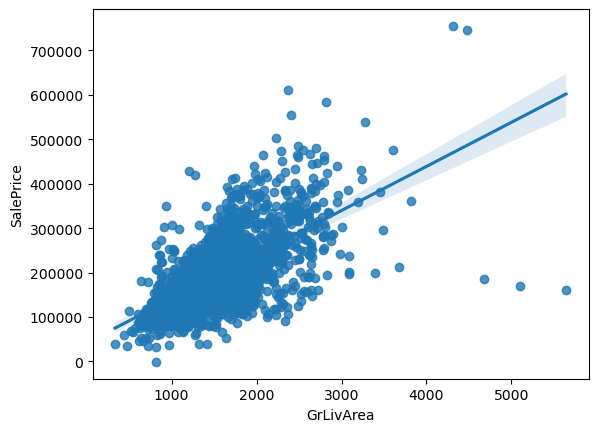

In [47]:
sns.regplot(data=df_train,x='GrLivArea',y='SalePrice')

#### **BsmtFullBath**

In [48]:
df_train.BsmtFullBath.value_counts()

BsmtFullBath
0.0    1344
1.0     927
2.0      28
3.0       2
Name: count, dtype: int64

<Axes: xlabel='BsmtFullBath', ylabel='SalePrice'>

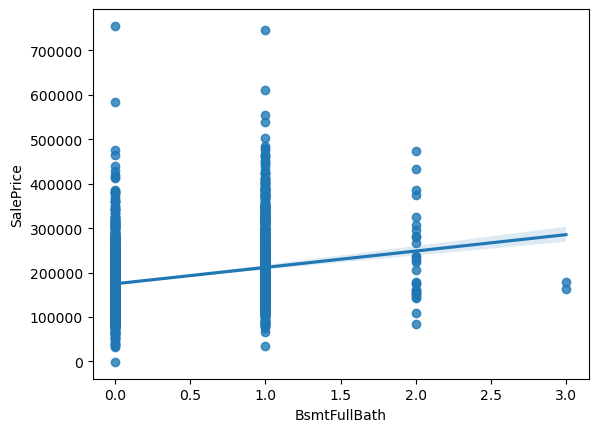

In [49]:
sns.regplot(data=df_train,x='BsmtFullBath',y='SalePrice')

#### **BedroomAbvGr**

<Axes: xlabel='BedroomAbvGr', ylabel='Count'>

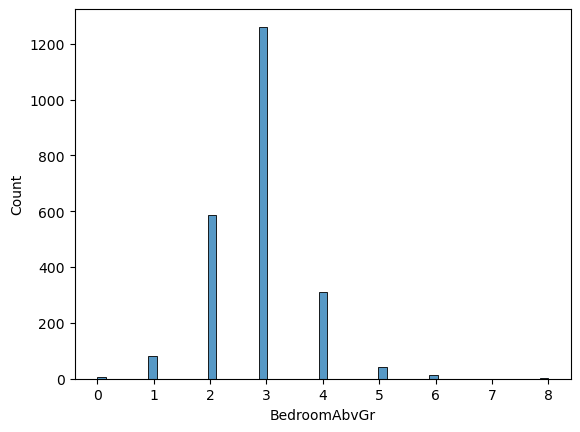

In [50]:
sns.histplot(df_train.BedroomAbvGr)

#### **GarageArea**

<Axes: xlabel='GarageArea', ylabel='Count'>

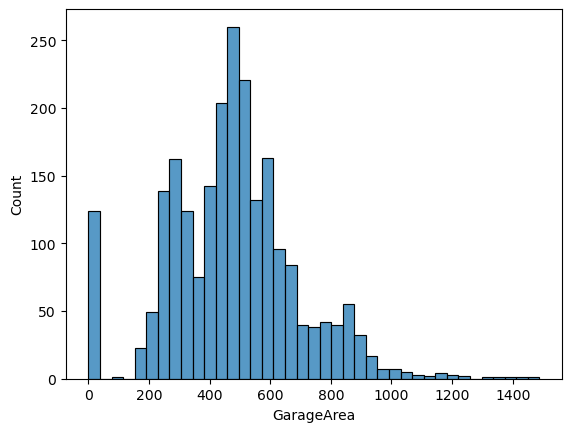

In [51]:
sns.histplot(df_train.GarageArea)

In [52]:
df_train.groupby('Utilities').agg({
    'SalePrice': 'median'
})

,SalePrice
Utilities,
AllPub,173712.92705
NoSeWa,137500.00000


In [53]:
df_test.Utilities.value_counts()

Utilities
AllPub    626
NoSeWa      1
Name: count, dtype: int64

In [56]:
df_train.FireplaceQu.value_counts()

FireplaceQu
Gd    595
TA    462
Fa     58
Po     34
Ex     33
Name: count, dtype: int64

<Axes: xlabel='WoodDeckSF', ylabel='Count'>

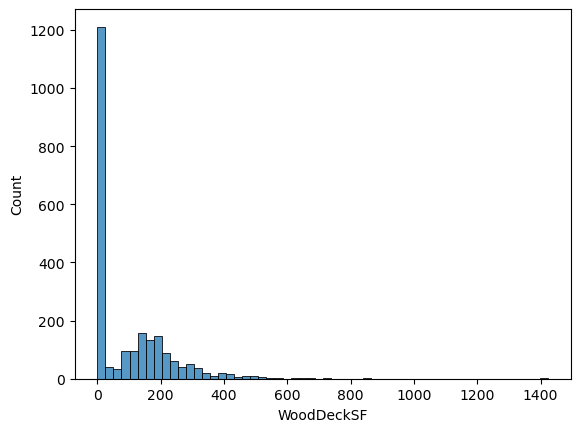

In [55]:
sns.histplot(df_train.WoodDeckSF)